In [2]:
import numpy as np
import pandas as pd

import spacy

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from gensim.models import Word2Vec, FastText

from sklearn.manifold import TSNE

from os import walk, system, path
import re

## Resumen
En este nootebook probamos con dos liberiras diferentes para hacer el preprocesamiento. NLTK y SpaCy y a su vez porbamos con ds modelos de word-embeding distintos word2vec y FastText.

El objetivo es agrupar los diferrerntes tipos de entidades que existan en el documento. Identificar laborartorios, tratamientos y cientificos

In [3]:
corpus_path = '../Files/project-corpus/'
file_texts = []
for (dirpath, dirnames, filenames) in walk(corpus_path):
  files = [ path.join(dirpath, filename) for filename in filenames if filename[-3:] == 'txt']
  for file_name in files:
    try:
      with open(file_name, 'r', encoding='utf-8') as file:
        file_texts.append(file.read())
    except:
      print(f'file {file_name} could not be opened')

file_texts = pd.Series(file_texts)
file_texts

0      ﻿BioScience Trends. 2020; 14(1):64-68.\n\nBrie...
1      ﻿\nstatistical analysis plan for a recursive t...
2      Role of GS-5734 (Remdesivir) in inhibiting SAR...
3      IFN-I response timing relative to virus replic...
4      Small-Molecule Antiviral ␤-D-N4-Hydroxycytidin...
                             ...                        
110    ﻿Journal of Infection 80 (2020) 394–400\n\nCon...
111    ﻿Int. J. Biol. Sci. 2020, Vol. 16\n\nIvyspring...
112    Teicoplanin: an alternative drug for the treat...
113    ﻿The epidemiology and pathogenesis of coronavi...
114    Inevitable isolation and the change\nof stress...
Length: 115, dtype: object

# NLTK

In [4]:
reg = re.compile(r'[A-Za-z\.,\'\s-]+')
porter_stemmer = PorterStemmer()

def preprocessing_nltk(doc):
    document = doc.lower()
    document = ' '.join(reg.findall(document))
    tokens = word_tokenize(document)
    tokens = [porter_stemmer.stem(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]

    return tokens

norm_corpus = file_texts.apply(preprocessing_nltk)
norm_corpus

0      [bioscienc, trend, ., -, ., brief, report, doi...
1      [statist, analysi, plan, recurs, twostag, grou...
2      [role, gs-, remdesivir, inhibit, sars-cov, mer...
3      [ifn-i, respons, time, rel, viru, replic, dete...
4      [small-molecul, antivir, -d-n, -hydroxycytidin...
                             ...                        
110    [journal, infect, content, list, avail, scienc...
111    [int, ., j., biol, ., sci, ., ,, vol, ., ivysp...
112    [teicoplanin, altern, drug, treatment, covid-,...
113    [epidemiolog, pathogenesi, coronaviru, diseas,...
114    [inevit, isol, chang, stress, marker, hemodial...
Length: 115, dtype: object

## Word2Vec

In [5]:
model_1 = Word2Vec(norm_corpus, size=100, window=5, min_count=1, workers=4)
model_1

In [6]:
model_1.similar_by_vector('arbidol', topn=10)

[('factor', 0.9991350173950195),
 ('receiv', 0.9991090893745422),
 ('md', 0.999108076095581),
 ('count', 0.9990951418876648),
 ('data', 0.9990869760513306),
 ('product', 0.9990848302841187),
 ('extract', 0.9990823268890381),
 ('increas', 0.9990758895874023),
 ('analys', 0.9990741014480591),
 ('ml', 0.9990649223327637)]

In [7]:
model_1.similar_by_vector('interferon', topn=10)

[('use', 0.9998855590820312),
 ('show', 0.9998822808265686),
 ('express', 0.9998801946640015),
 ('vivo', 0.9998589158058167),
 ('blood', 0.9998481273651123),
 ('product', 0.9998434782028198),
 ('quantit', 0.9998383522033691),
 ('determin', 0.9998379349708557),
 ('rdv', 0.9998339414596558),
 ('ifnb', 0.9998292922973633)]

In [8]:
(
  model_1.similarity('drug', 'interferon'),
  model_1.similarity('arbidol', 'interferon'),
  model_1.similarity('shanghai', 'interferon'),
  model_1.similarity('shanghai', 'arbidol'),
)

(0.9992312, 0.999006, 0.99278986, 0.991947)

## FastText

In [9]:
model_2 = FastText(sentences=norm_corpus, size=100, window=5, min_count=1, workers=4)  # instantiate
model_2

In [10]:
model_2.similar_by_vector('drug', topn=10)

[('ef', 0.9998560547828674),
 ('antibodymedi', 0.9998246431350708),
 ('antibody-medi', 0.9998236894607544),
 ('avail', 0.9998201131820679),
 ('studi', 0.99980229139328),
 ('ifn-', 0.9997856020927429),
 ('proteinac', 0.9997664093971252),
 ('ifn-i', 0.9997516870498657),
 ('protein-', 0.9997495412826538),
 ('proteolyt', 0.999739408493042)]

In [11]:
model_1.similar_by_vector('interferon', topn=10)

[('use', 0.9998855590820312),
 ('show', 0.9998822808265686),
 ('express', 0.9998801946640015),
 ('vivo', 0.9998589158058167),
 ('blood', 0.9998481273651123),
 ('product', 0.9998434782028198),
 ('quantit', 0.9998383522033691),
 ('determin', 0.9998379349708557),
 ('rdv', 0.9998339414596558),
 ('ifnb', 0.9998292922973633)]

In [12]:
model_2.similar_by_vector('shanghai', topn=10)

[('bshanghai', 0.9999870657920837),
 ('taiwan', 0.9999737739562988),
 ('mediterranean', 0.9999606609344482),
 ('guangzhou', 0.9999566078186035),
 ('med', 0.9999359846115112),
 ('chiang', 0.9999324679374695),
 ('chonbuk', 0.9999310970306396),
 ('schiff', 0.9999299049377441),
 ('zhangc', 0.9999263286590576),
 ('median', 0.9999251365661621)]

In [13]:
(
  model_2.similarity('arbidol', 'interferon'),
  model_2.similarity('shanghai', 'interferon'),
  model_2.similarity('shanghai', 'arbidol'),
)

(0.9998224, 0.99888486, 0.998325)

## SpaCy

In [14]:
nlp = spacy.load("en_core_web_lg")

In [15]:
spacy_text = file_texts.apply(nlp)
spacy_text = spacy_text.to_frame()
spacy_text.columns = ['spacy_txt']
spacy_text

,spacy_txt
0,"(﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,..."
1,"(﻿, \n, statistical, analysis, plan, for, a, r..."
2,"(Role, of, GS-5734, (, Remdesivir, ), in, inhi..."
3,"(IFN, -, I, response, timing, relative, to, vi..."
4,"(Small, -, Molecule, Antiviral, ␤, -D, -, N4-H..."
...,...
110,"(﻿Journal, of, Infection, 80, (, 2020, ), 394–..."
111,"(﻿Int, ., J., Biol, ., Sci, ., 2020, ,, Vol, ...."
112,"(Teicoplanin, :, an, alternative, drug, for, t..."
113,"(﻿The, epidemiology, and, pathogenesis, of, co..."


In [16]:
def preprocessing_spacy(spacy_doc):
    return [ token.lemma_.lower() for token in spacy_doc 
        if not token.is_stop and not token.is_space and not token.is_punct
    ]
spacy_text['clean_text'] = spacy_text.spacy_txt.apply(preprocessing_spacy)
spacy_text

,spacy_txt,clean_text
0,"(﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,...","[﻿bioscience, trends, 2020, 14(1):64, 68, brie..."
1,"(﻿, \n, statistical, analysis, plan, for, a, r...","[﻿, statistical, analysis, plan, recursive, tw..."
2,"(Role, of, GS-5734, (, Remdesivir, ), in, inhi...","[role, gs-5734, remdesivir, inhibit, sars, cov..."
3,"(IFN, -, I, response, timing, relative, to, vi...","[ifn, response, timing, relative, virus, repli..."
4,"(Small, -, Molecule, Antiviral, ␤, -D, -, N4-H...","[small, molecule, antiviral, ␤, -d, n4-hydroxy..."
...,...,...
110,"(﻿Journal, of, Infection, 80, (, 2020, ), 394–...","[﻿journal, infection, 80, 2020, 394–400, conte..."
111,"(﻿Int, ., J., Biol, ., Sci, ., 2020, ,, Vol, ....","[﻿int, j., biol, sci, 2020, vol, 16, ivyspring..."
112,"(Teicoplanin, :, an, alternative, drug, for, t...","[teicoplanin, alternative, drug, treatment, co..."
113,"(﻿The, epidemiology, and, pathogenesis, of, co...","[﻿the, epidemiology, pathogenesis, coronavirus..."


## word2Vec

In [17]:
model_3 = Word2Vec(spacy_text['clean_text'], size=100, window=3, min_count=1, workers=4)
model_3

In [18]:
model_3.similar_by_vector('arbidol', topn=10)

[('12', 0.9975446462631226),
 ('range', 0.9975194931030273),
 ('5', 0.9975155591964722),
 ('administration', 0.9975134134292603),
 ('age', 0.9975097179412842),
 ('domain', 0.9975074529647827),
 ('measure', 0.9975037574768066),
 ('show', 0.9974982738494873),
 ('population', 0.9974960088729858),
 ('number', 0.9974954724311829)]

In [19]:
model_3.similar_by_vector('shanghai', topn=10)

[('medicine', 0.9989163875579834),
 ('national', 0.9989072680473328),
 ('college', 0.9988391399383545),
 ('beijing', 0.9988229870796204),
 ('university', 0.9987292289733887),
 ('hospital', 0.9986954927444458),
 ('medical', 0.998681902885437),
 ('taiwan', 0.9986732006072998),
 ('chinese', 0.9986388087272644),
 ('science', 0.9985678791999817)]

In [20]:
model_3.similar_by_vector('interferon', topn=10)

[('show', 0.9998514652252197),
 ('test', 0.9998295307159424),
 ('cat', 0.9998286962509155),
 ('effect', 0.9998233318328857),
 ('require', 0.9998122453689575),
 ('increase', 0.9998068809509277),
 ('mouse', 0.9998036623001099),
 ('study', 0.9998026490211487),
 ('c', 0.9998021125793457),
 ('type', 0.9997994899749756)]

In [21]:
(
  model_3.similarity('drug', 'interferon'),
  model_3.similarity('drug', 'arbidol'),
  model_3.similarity('arbidol', 'interferon'),
  model_3.similarity('interferon', 'article'),
)

(0.9997055, 0.99723876, 0.9973707, 0.99978447)

## FastText

In [22]:
model_4 = FastText(sentences=spacy_text['clean_text'], size=100, window=5, min_count=1, workers=4)  # instantiate
model_4

In [23]:
model_4.similar_by_vector('arbidol', topn=10)

[('shrna)-expressing', 0.9999675750732422),
 ('immunohistochemistry', 0.9999672174453735),
 ('anaesthetist', 0.999967098236084),
 ('referral', 0.9999664425849915),
 ('sterile', 0.9999662637710571),
 ('tetrandrine', 0.999966025352478),
 ('promising', 0.9999655485153198),
 ('n4-hydroxycytidine', 0.9999648332595825),
 ('analyst', 0.9999648332595825),
 ('unable', 0.9999644756317139)]

In [24]:
model_4.similar_by_vector('shanghai', topn=10)

[('bshanghai', 0.9999791383743286),
 ('universidade', 0.9999672174453735),
 ('beijing', 0.9999644160270691),
 ('universal', 0.9999642968177795),
 ('technology', 0.9999445676803589),
 ('sciences', 0.9999421834945679),
 ('tai', 0.9999409914016724),
 ('median', 0.9999400973320007),
 ('mediterranean', 0.9999319911003113),
 ('gynecology', 0.9999306201934814)]

In [25]:
model_4.similar_by_vector('interferon', topn=10)

[('intend', 0.9999883770942688),
 ('interlobular', 0.9999871253967285),
 ('grant', 0.9999862909317017),
 ('chemotherapeutic', 0.9999862313270569),
 ('variant', 0.9999861717224121),
 ('interferons', 0.9999861121177673),
 ('antibacterial', 0.9999857544898987),
 ('triton', 0.9999856948852539),
 ('preoperative', 0.9999849796295166),
 ('surfactant', 0.9999847412109375)]

In [26]:
(
  model_4.similarity('drug', 'interferon'),
  model_4.similarity('arbidol', 'interferon'),
  model_4.similarity('shanghai', 'interferon'),
  model_4.similarity('shanghai', 'arbidol'),
  model_4.similarity('arbidol', 'mers'),
)

(0.9992808, 0.99952424, 0.9992983, 0.9981948, 0.9751799)

# Entities

In [27]:
spacy_text.spacy_txt.head()

0    (﻿BioScience, Trends, ., 2020, ;, 14(1):64, -,...
1    (﻿, \n, statistical, analysis, plan, for, a, r...
2    (Role, of, GS-5734, (, Remdesivir, ), in, inhi...
3    (IFN, -, I, response, timing, relative, to, vi...
4    (Small, -, Molecule, Antiviral, ␤, -D, -, N4-H...
Name: spacy_txt, dtype: object

In [28]:
entities = pd.DataFrame(
  spacy_text.spacy_txt
  .apply(lambda doc: doc.ents)
  .apply(pd.Series)
  .values
  .reshape(-1),
  columns=['entitie']
).dropna()
entities['label'] = entities.entitie.apply(lambda ent: ent.label_)
entities['text'] = entities.entitie.apply(lambda ent: ent.text.lower())

entities = entities[
    entities.label.isin(['ORG', 'LAW', 'PERSON', 'WORK_OF_ART', 'PRODUCT'])
    & (entities.text.str.len() > 3)
].reset_index(drop=True)
entities

,entitie,label,text
0,"(﻿BioScience, Trends)",ORG,﻿bioscience trends
1,(Xiaorong),PERSON,xiaorong
2,(Yunfei),PERSON,yunfei
3,"(Feifei, Chen3)",ORG,feifei chen3
4,"(Wei, Zhang3)",PERSON,wei zhang3
...,...,...,...
4124,(MERS),PERSON,mers
4125,(MERS),PERSON,mers
4126,"(National, Disaster, Management)",ORG,national disaster management
4127,"(MERS, -, CoV)",ORG,mers-cov


In [29]:
entities[['text', 'label']].to_csv('../Files/project_entities.csv')

# Clustering 

In [77]:
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

%matplotlib inline

samples = entities[
    entities.text.str.contains('interf')
    | entities.text.str.contains('tonavir')
]
samples[['text', 'label']].head()

,text,label
14,lopinavir/ritonavir,ORG
17,lopinavir/ritonavir,ORG
29,interferon-β1b,LAW
30,lopinavir/ritonavir,ORG
35,lopinavir/ritonavir,ORG


## Modelo 1 - (NLTK, word2vec)

2,3,4,5,6,7,8,9,10,11,12,13,14,

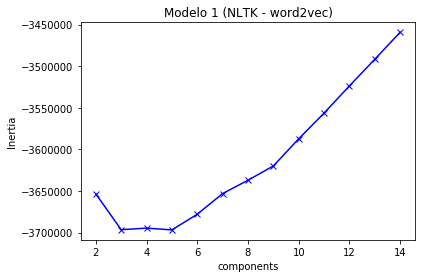

In [31]:
def ent_vector(ent):
    tokens = preprocessing_nltk(ent.text)
    vectors = np.array([model_1[t] for t in tokens if t in model_1])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_1 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_1.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_1.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

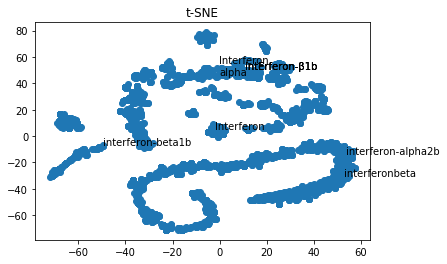

In [32]:
tsne = TSNE(n_components=2).fit_transform(vectors_1)
pca = PCA(n_components=2).fit_transform(vectors_1)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 2 - (NLTK, fastText)

2,3,4,5,6,7,8,9,10,11,12,13,14,

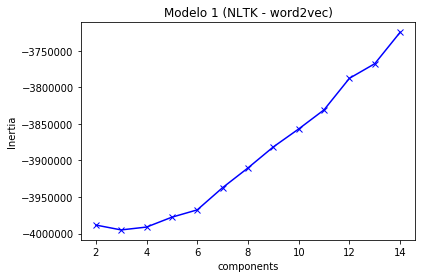

In [33]:
def ent_vector(ent):
    tokens = preprocessing_nltk(ent.text)
    vectors = np.array([model_2[t] for t in tokens if t in model_2])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_2 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_2.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_2.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

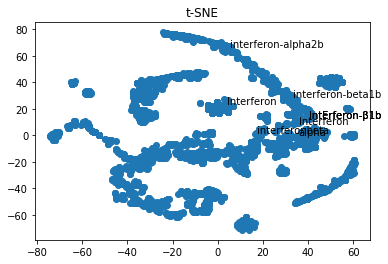

In [34]:
tsne = TSNE(n_components=2).fit_transform(vectors_2)
pca = PCA(n_components=2).fit_transform(vectors_2)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 3 - (spacy, word2vec)

2,3,4,5,6,7,8,9,10,11,12,13,14,

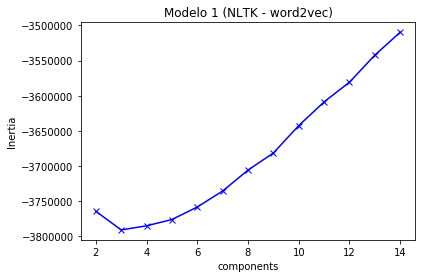

In [35]:
def ent_vector(ent):
    tokens = preprocessing_spacy(ent)
    vectors = np.array([model_3[t] for t in tokens if t in model_3])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_3 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_3.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_3.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

In [ ]:
tsne = TSNE(n_components=2).fit_transform(vectors_3)
pca = PCA(n_components=2).fit_transform(vectors_3)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

## Modelo 4 - (spacy, fastText)

2,3,4,5,6,7,8,9,10,11,12,13,14,

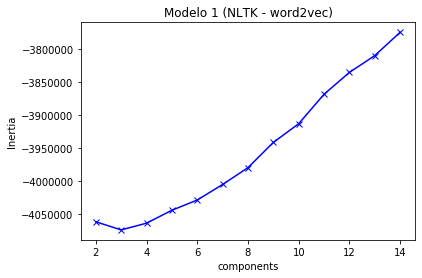

In [38]:
def ent_vector(ent):
    tokens = preprocessing_spacy(ent)
    vectors = np.array([model_4[t] for t in tokens if t in model_4])
    return vectors.mean(axis=0)

entities['vector'] = entities.entitie.apply(ent_vector)
vectors_4 = entities['vector'].apply(pd.Series).dropna()

squared_distances = np.zeros(13)
K = range(2, 15)
for k in K:
    print(k, end=',')
    gm = GaussianMixture(n_components=k)
    gm = gm.fit(vectors_4.to_numpy())
    squared_distances[k-2] = gm.bic(vectors_4.to_numpy())
    
plt.plot(K, squared_distances, 'bx-')
plt.title('Modelo 1 (NLTK - word2vec)')
plt.xlabel('components')
plt.ylabel('Inertia')
plt.show()

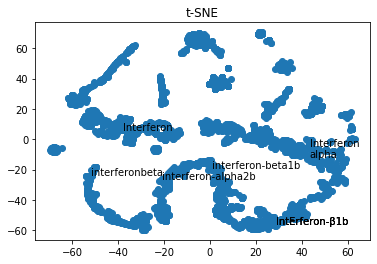

In [53]:
tsne = TSNE(n_components=2).fit_transform(vectors_4)
pca = PCA(n_components=2).fit_transform(vectors_4)

plt.title('t-SNE')
plt.scatter(tsne[:, 0], tsne[:, 1])
for idx, ent in samples.iterrows():
    plt.annotate(ent.entitie.text, tsne[idx])

# Resultados clusterring
## modelo 1

In [54]:
entities['labels_1'] = None
entities['labels_2'] = None
entities['labels_3'] = None
entities['labels_4'] = None

In [55]:
gm_1 = GaussianMixture(n_components=4)
entities['labels_1'].loc[vectors_1.index] = gm_1.fit_predict(vectors_1)
gm_2 = GaussianMixture(n_components=4)
entities['labels_2'].loc[vectors_2.index] = gm_2.fit_predict(vectors_2)
gm_3 = GaussianMixture(n_components=4)
entities['labels_3'].loc[vectors_3.index] = gm_3.fit_predict(vectors_3)
gm_4 = GaussianMixture(n_components=4)
entities['labels_4'].loc[vectors_4.index] = gm_4.fit_predict(vectors_4)

In [56]:
entities[['text', 'labels_1', 'labels_2', 'labels_3', 'labels_4']].to_csv('../Files/clustering_resutls.csv')

In [117]:
class_prob = gm_3.predict_proba(vectors_3)

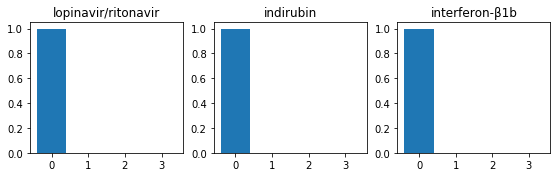

In [121]:
samples = [17, 1099, 29]

plt.figure(figsize=[6.4*len(samples), 4.8/2])

for i, s in enumerate(samples):
    plt.subplot(130+i+1 + (len(samples) * 10))
    plt.title(entities.text.iloc[s])s
    plt.bar(range(4), class_prob[s])

plt.show()